# Import des données et des librairies

In [63]:
#import des librairies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data cleaning

In [64]:
df = pd.read_csv('netflix_titles.csv')
df.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
2                                                NaN  September 24, 2021   
3                                                NaN  September 24, 2021   
4                                              India  September 24, 2021   
5                                                NaN  September 24, 2021   
6                                                NaN  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   
9                                      United States  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   
6          2021     PG     91 min   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   
9          2021  PG-13    104 min   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented 

In [3]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [4]:
#On enlève est raw en double
df.drop_duplicates(inplace= True)

In [5]:
df.info() # on n'a aucune valeur nulle

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


In [6]:
df.date_added 

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [7]:

df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.date_added 

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [112]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
Pour se faciliter la tâche on peut utiliser la librairie sweetviz.


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



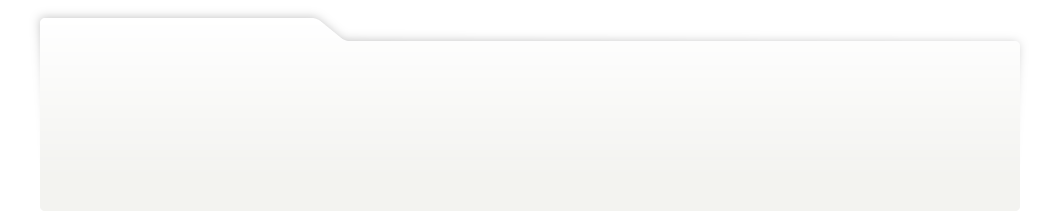
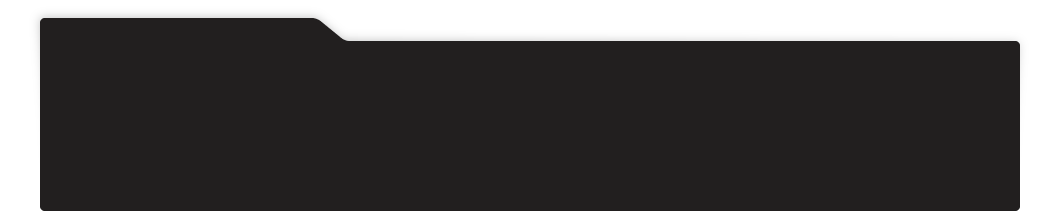
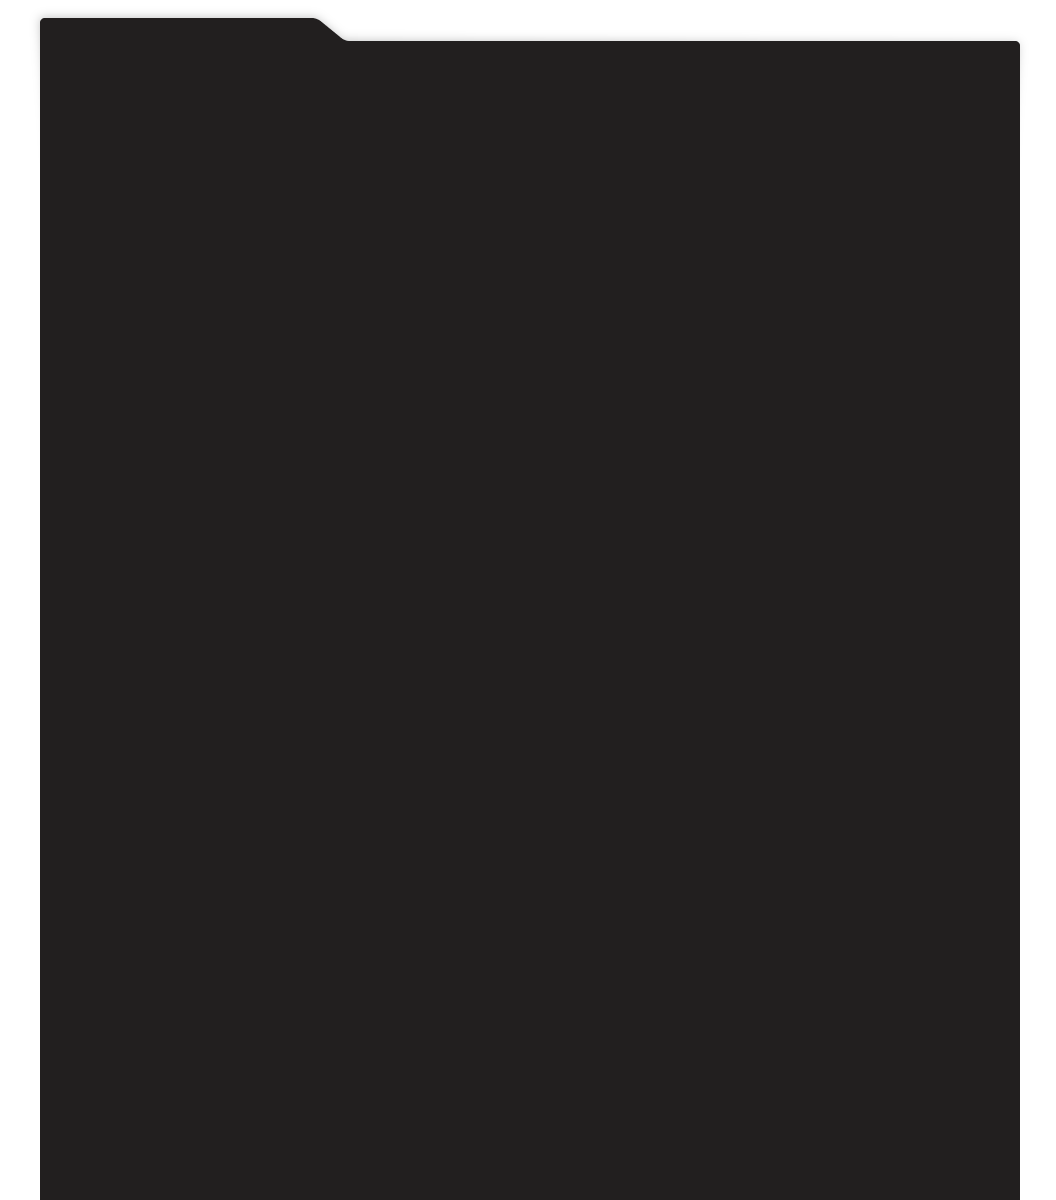
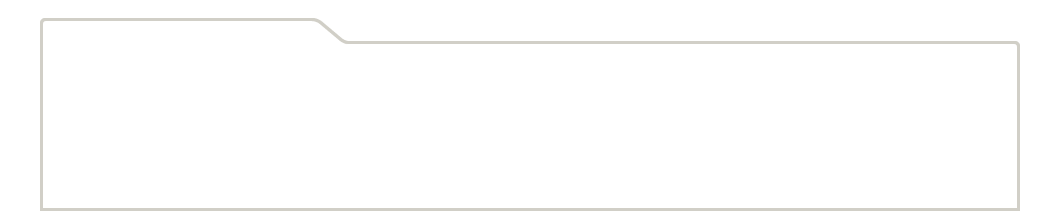
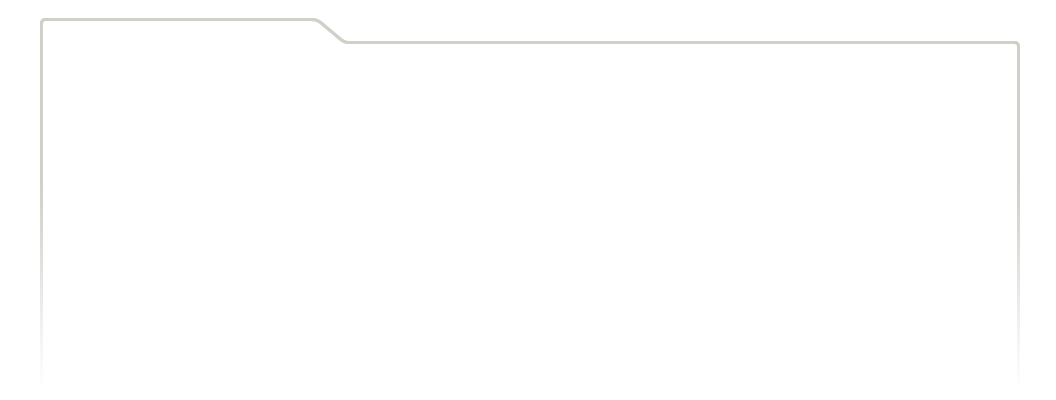
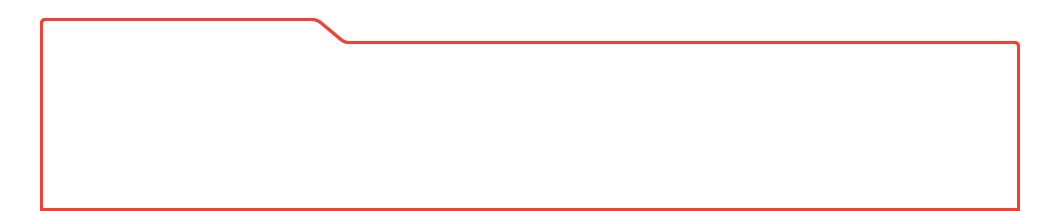
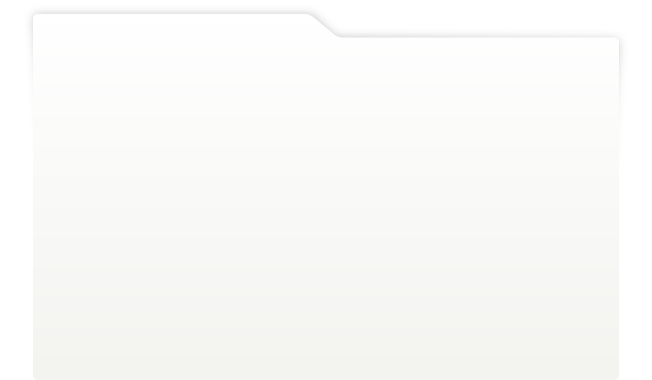
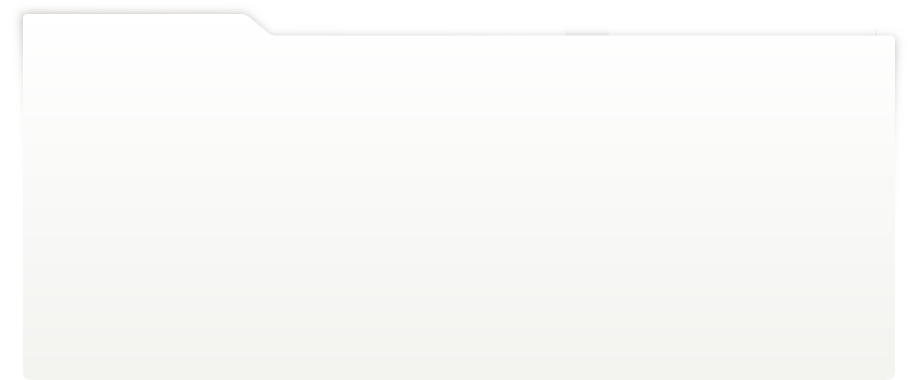
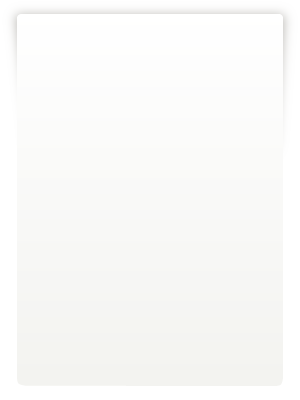
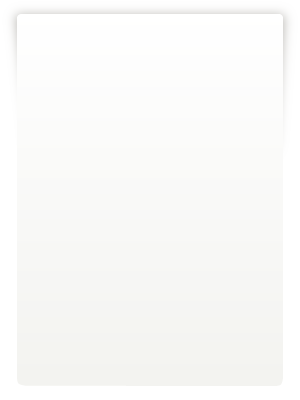
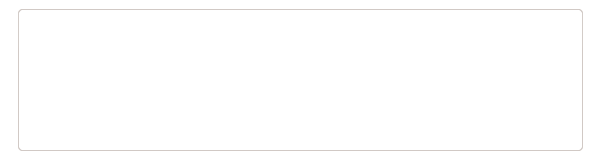
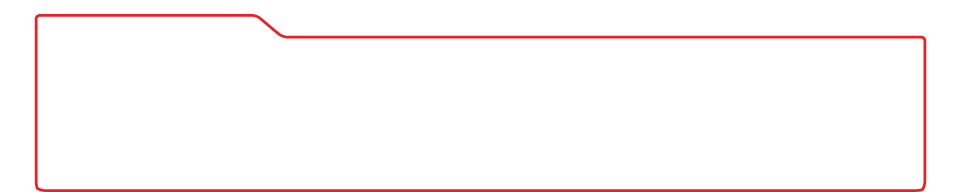
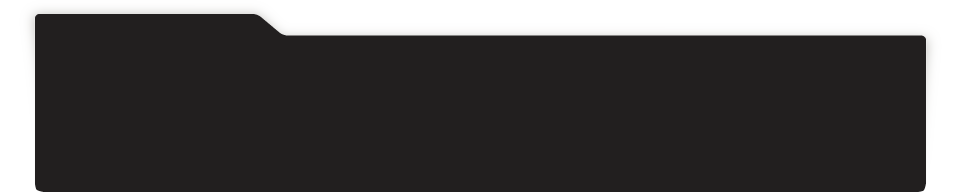
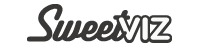
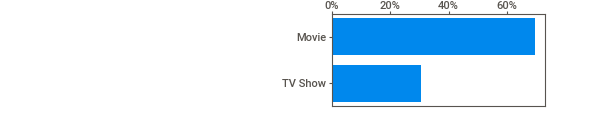
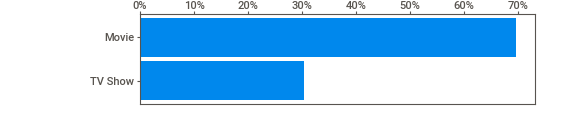
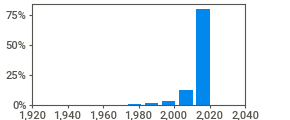
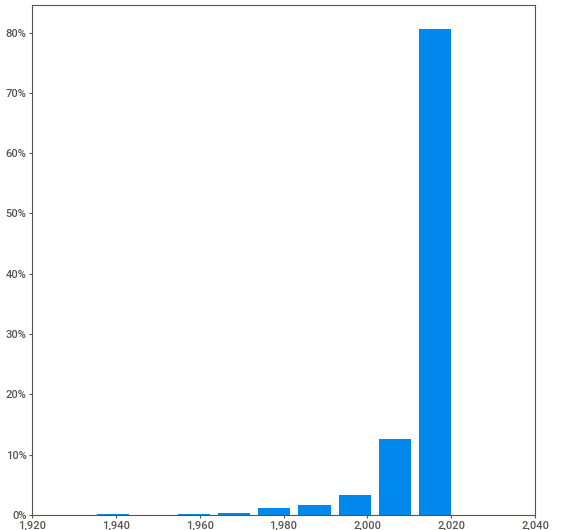
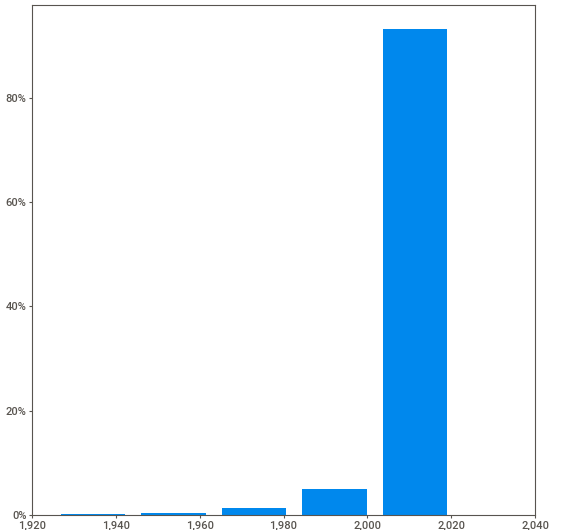
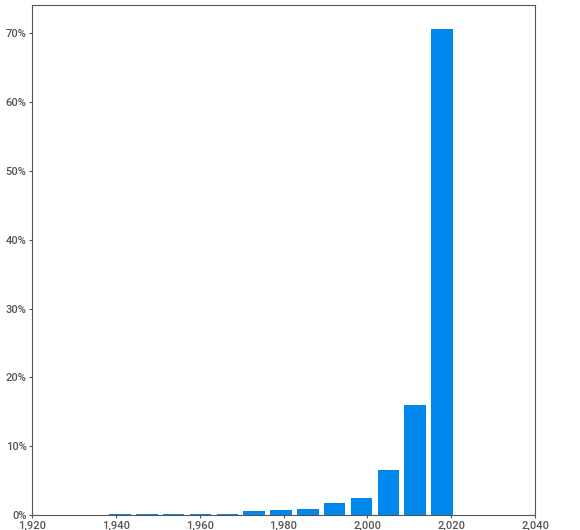
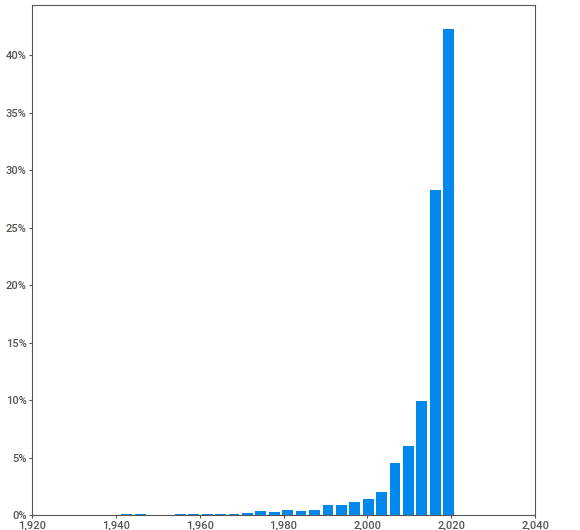
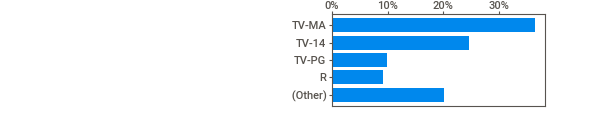
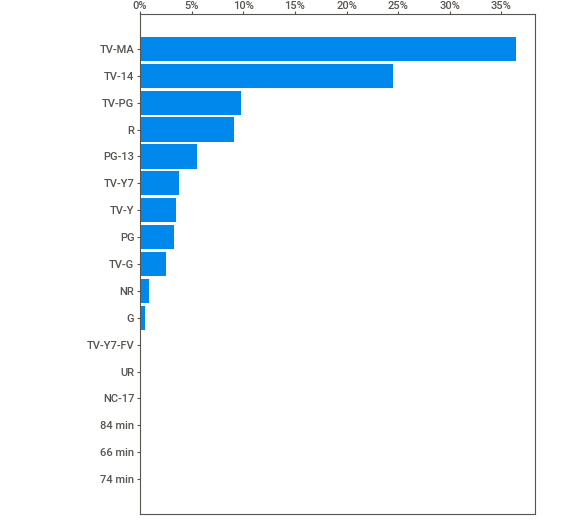
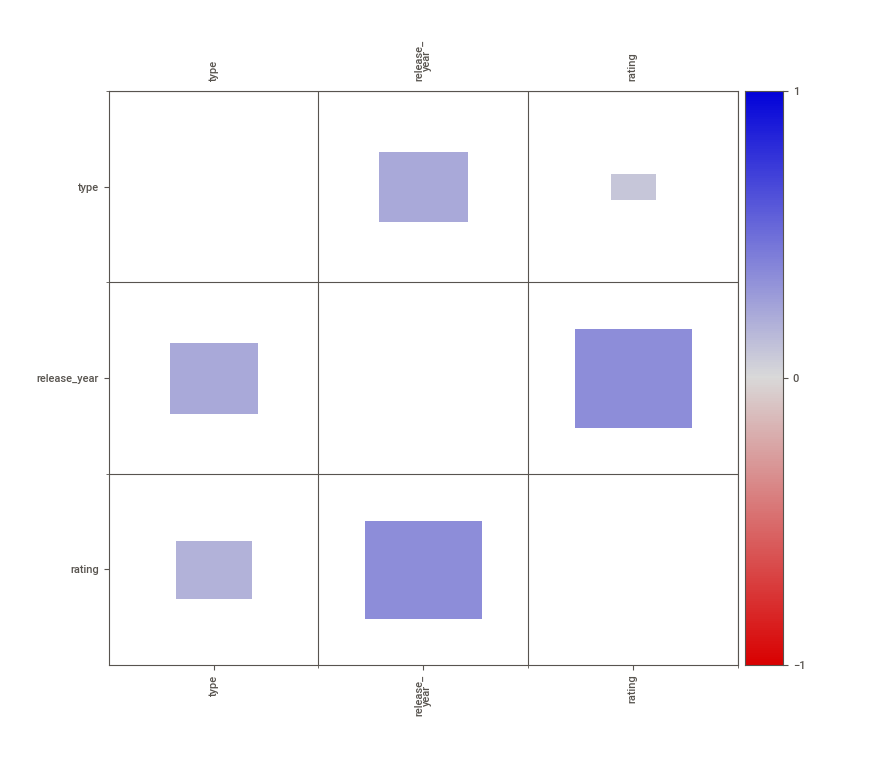
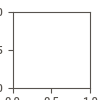

In [113]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')
sweet_report.show_notebook()

# Visualisation

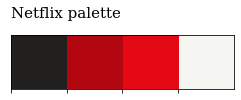

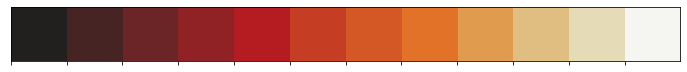

In [80]:
#On affiche les couleurs de la marque Netflix 
palette = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
palette_grad = ["#221f1f", "#472424", "#6c2526", "#902226", "#b51c22", "#c53d23", "#d45825", "#e27228", "#e09b4f", "#e0bd80", "#e5dbb7", "#f5f5f1"]

sns.palplot(palette)
plt.title("Netflix palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
sns.palplot(pal)

plt.show()

## Analyse type de contenu

In [9]:
df.type.unique() # il y a deuxt types de contenu

array(['Movie', 'TV Show'], dtype=object)

In [10]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})
trace = go.Pie(labels=["Films","TV Shows"], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=[palette[0],palette[2]]))
layout = go.Layout(title="Répartition des Films et TV Show sur Netflix", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [11]:

df_tv_show = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

col = "year_added"

vc1 = df_tv_show[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = df_movie[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color=palette[2]))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Films", marker=dict(color=palette[0]))


data = [trace1, trace2]
layout = go.Layout(title="Type de contenu ajouté au cours du temps", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [12]:
df_movie['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [13]:
df_movie['duration'].str.extract('(\d+)')# on enleve le nb au sein du string "XX min"

0
0      90
6      91
7     125
9     104
12    127
...   ...
8801   96
8802  158
8804   88
8805   88
8806  111

[6131 rows x 1 columns]

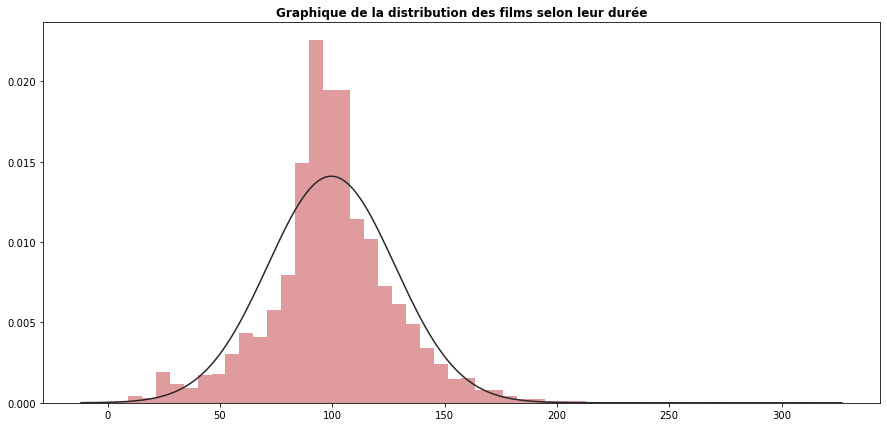

In [14]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movie['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=palette[1]) 
plt.title('Graphique de la distribution des films selon leur durée',fontweight="bold")
plt.show()


In [15]:
nb_saison = []
for i in df_tv_show['duration']:
    nb_saison.append(i[0])
df_tv_show["nb_saison"]= nb_saison

In [16]:
df_tv_show

show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                   NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   
...                                                 ...   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8796  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8800  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
8803                                                NaN   

                                            country date_added  release_year  \
1                                      South Africa 2021-09-24          2021   
2                                               NaN 2021-09-24          2021   
3                                               NaN 2021-09-24          2021   
4                                             India 2021-09-24          2021   
5                                               NaN 2021-09-24          2021   
...                                             ...        ...           ...   
8795                                  Japan, Canada 2018-05-01          2015   
8796                                         Turkey 2017-01-17          2016   
8797  United States, France, South Korea, Indonesia 2018-09-13          2016   
8800                                       Pakistan 2016-12-15          2012   
8803                                            NaN 2019-07-01          2018   

     rating   duration                                          listed_in  \
1     TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
2     TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Act...   
3     TV-MA   1 Season                             Docuseries, Reality TV   
4     TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
5     TV-MA   1 Season                 TV Dramas, TV Horror, TV Mysteries   
...     ...        ...                                                ...   
8795  TV-Y7  2 Seasons                             Anime Series, Kids' TV   
8796  TV-PG  2 Seasons                  International TV Shows, TV Dramas   
8797  TV-Y7  3 Seasons                                           Kids' TV   
8800  TV-PG   1 Season  International TV Shows, Romantic TV Shows, TV ...   
8803  TV-Y7  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies   

                                            description  month_added  \
1     After crossing paths at a party, a Cape Town t...          9.0   
2     To protect his family from a powerful drug lor...          9.0   
3     Feuds, flirtations and toilet talk go down amo...          9.0   
4     In a city of coaching centers known to train I...          9.0   
5     The arrival of a charismatic young priest brin...          9.0   
...                                                 ...          ...   
8795  Now that he's discovered the Pendulum Summonin...          5.0   
8796  During the Mongol invasions, Yunus Emre leaves.

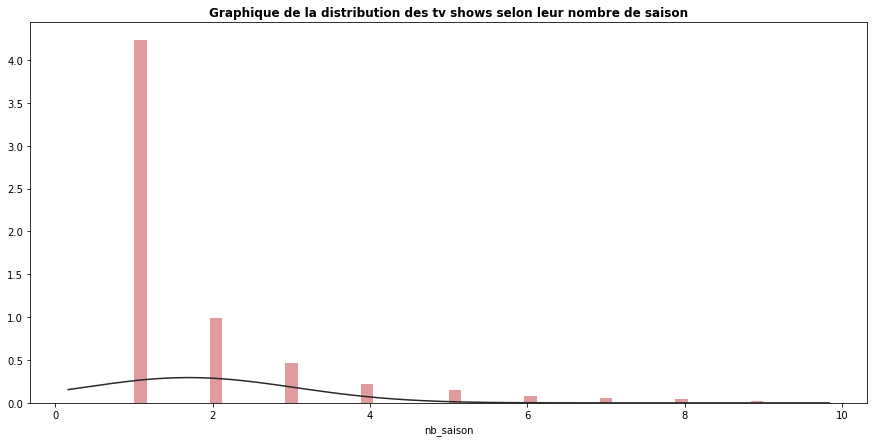

In [17]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_tv_show['nb_saison'],fit=norm,kde=False, color=palette[1]) # on enleve le nb au sein du string "XX min"
plt.title('Graphique de la distribution des tv shows selon leur nombre de saison',fontweight="bold")
plt.show()


## Analyse par pays

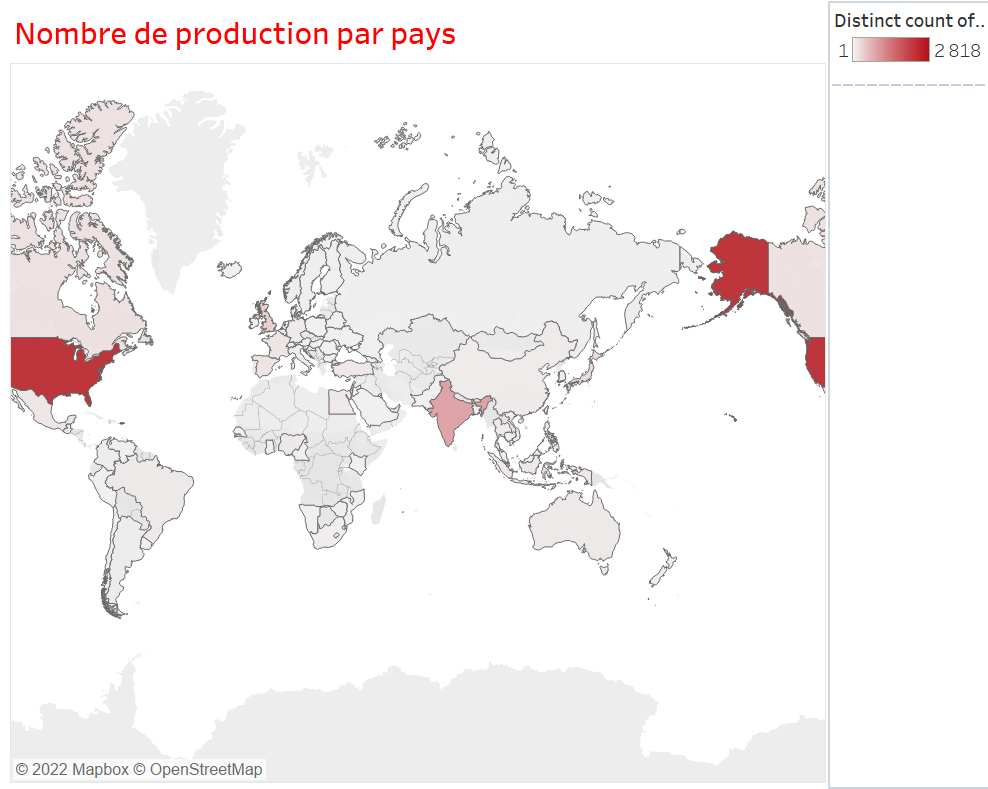

In [18]:
from IPython.display import Image
Image("map.png")

In [81]:
top_pays=df.country.value_counts()
top_pays=top_pays[:10][::-1] # on prend les 10 premiers

trace=go.Bar(x=top_pays.values,y=top_pays[:10].index,orientation='h',name='',marker=dict(color=palette_grad))

data = [trace]
layout = go.Layout(title="Pays avec le plus de contenu produit", height=700, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data, layout=layout)
fig.show()

In [51]:
top_pays.index[2:10]

Index(['France', 'Spain', 'Canada', 'South Korea', 'Japan', 'United Kingdom',
       'India', 'United States'],
      dtype='object')

In [59]:
from plotly.subplots import make_subplots
traces = []
lst_pays = top_pays.index[2:10]
for pays in lst_pays:
    
    indian_dir=df.loc[(df.country==str(pays)) & (df.type=="Movie")]
    # indian_dir.director.value_counts()[:12]
    col = "director"
    categories = ", ".join(indian_dir[col].fillna("")).split(", ")
    directors=pd.Series(categories)
    directors=directors.value_counts()[1:16]
    trace=go.Bar(x=directors.values[:4][::-1],y=directors.index[:10][::-1],orientation='h',marker=dict(color=palette))
    traces.append(trace)

fig = make_subplots(rows=2, cols=4, subplot_titles=lst_pays)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,2)
fig.add_trace(traces[2], 1,3)
fig.add_trace(traces[3], 1,4)
fig.add_trace(traces[4], 2,1)
fig.add_trace(traces[5], 2,2)
fig.add_trace(traces[6], 2,3)
fig.add_trace(traces[7], 2,4)


fig.update_layout(width=2800,height=1000, showlegend=False)
fig.show()

## Analyse du contenu

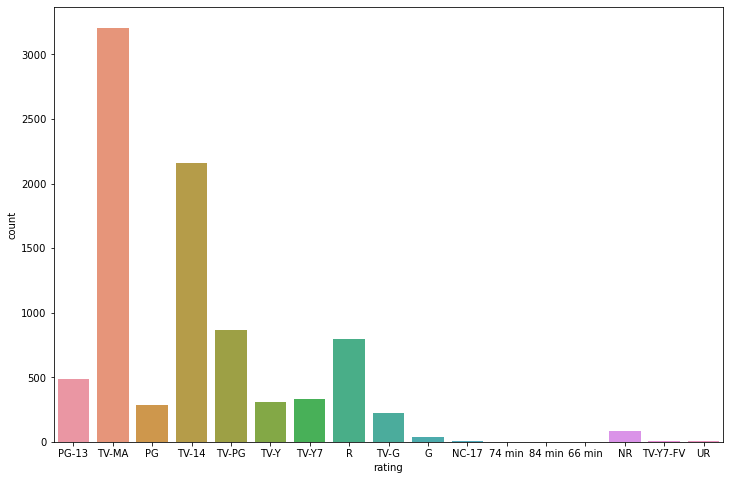

In [84]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

Text(0.5, 1.0, 'Top 10 des genres de film')

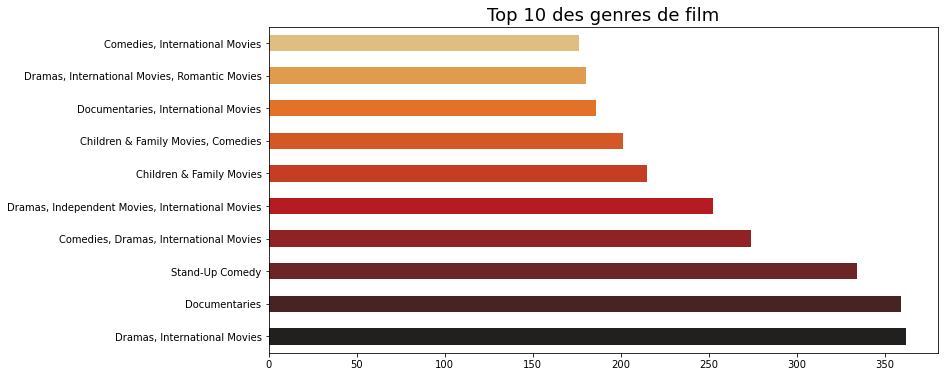

In [87]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color=palette_grad)
plt.title("Top 10 des genres de film",size=18)

Text(0.5, 1.0, 'Top 10 des genres de TV Show')

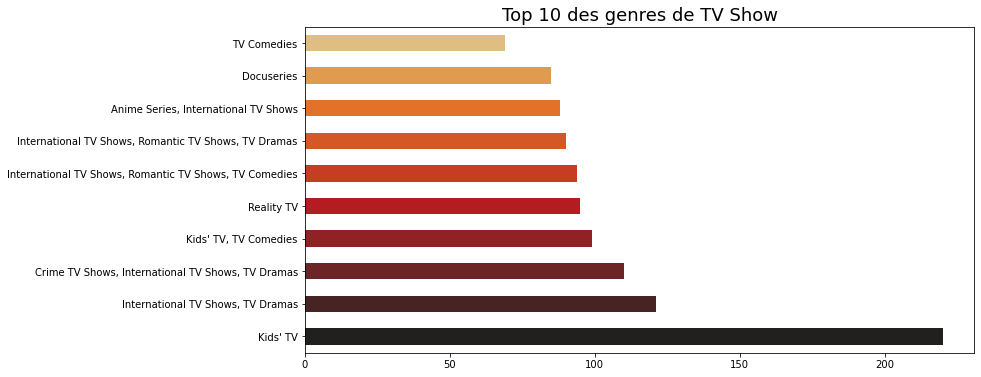

In [89]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color=palette_grad)
plt.title("Top 10 des genres de TV Show",size=18)

In [60]:
df_plus_vieux = df.sort_values("release_year", ascending = True)
df_plus_vieux = df_plus_vieux[df_plus_vieux['duration'] != ""]
df_plus_vieux[['title', "release_year"]][:10] #on affiche les 10 films les plus vieux

title  release_year
4250                 Pioneers: First Women Filmmakers*          1925
7790                                    Prelude to War          1942
8205                              The Battle of Midway          1942
8660     Undercover: How to Operate Behind Enemy Lines          1943
8739                Why We Fight: The Battle of Russia          1943
8763                   WWII: Report from the Aleutians          1943
8640                                  Tunisian Victory          1944
8436                                 The Negro Soldier          1944
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944
7930                                        San Pietro          1945

In [61]:
df_plus_recent = df.sort_values("release_year", ascending = False)
df_plus_recent = df_plus_recent[df_plus_recent['duration'] != ""]
df_plus_recent[['title', "release_year"]][:10] #on affiche les 10 films les plus récent

title  release_year
693                 Ali & Ratu Ratu Queens          2021
781  Black Holes | The Edge of All We Know          2021
762                           Sweet & Sour          2021
763                            Sweet Tooth          2021
764           Trippin' with the Kandasamys          2021
765                                 Xtreme          2021
766                Alan Saldaña: Locked Up          2021
767                   Creator's File: GOLD          2021
768                         Dancing Queens          2021
770              Myriam Fares: The Journey          2021

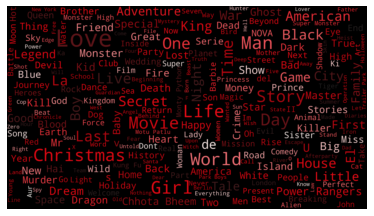

In [67]:

from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", palette)

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('netflix_logo.png'))

wordcloud = WordCloud(background_color = 'black', width = 500,  height = 200,colormap=cmap, max_words = 250, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
On remarque une que les termes: Love, World, Chrismas, Family, Life, American, Girl, Movie.
Ce sont des mots fréquemment utilisés dans les titres de film donc le word cloud me semble juste.

In [92]:
pip install TextBlop

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement TextBlop (from versions: none)
ERROR: No matching distribution found for TextBlop


In [90]:
from textblob import TextBlob

dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

ModuleNotFoundError: No module named 'textblob'